
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [20]:
student_number = '400101872'
first_name = 'Matin'
last_name = 'Mohamad ghasemi'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.graph_objects as go


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Display the first few rows of the dataframe
print(df.head())

# Define the relevant features
relevant_features = [
    'track_name', 'acousticness', 'danceability', 'energy', 
    'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'valence'
]

# Select only the relevant features
df = df[relevant_features]

# Drop rows with missing values
df.dropna(inplace=True)

# Display the first few rows of the modified dataframe
print(df.head())


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

`Answer:`
Standardizing data is essential for clustering algorithms that rely on distance metrics, like K-means. If the data is not standardized, features with larger numerical ranges can dominate the clustering process, resulting in biased and skewed clusters.

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

class ManualStandardScaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Assuming df is your dataframe and features are both categorical and continuous
label_encoder = LabelEncoder()
categorical_features = ['categorical_column1', 'categorical_column2']  # Update with your categorical columns
for col in categorical_features:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

continuous_features = df.drop(categorical_features + ['track_name'], axis=1).columns
scaler = ManualStandardScaler()
scaled_features = scaler.fit_transform(df[continuous_features].values)
scaled_df = pd.DataFrame(scaled_features, columns=continuous_features)

# Combine the encoded categorical columns with scaled continuous columns
final_df = pd.concat([df[categorical_features + ['track_name']], scaled_df], axis=1)



# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

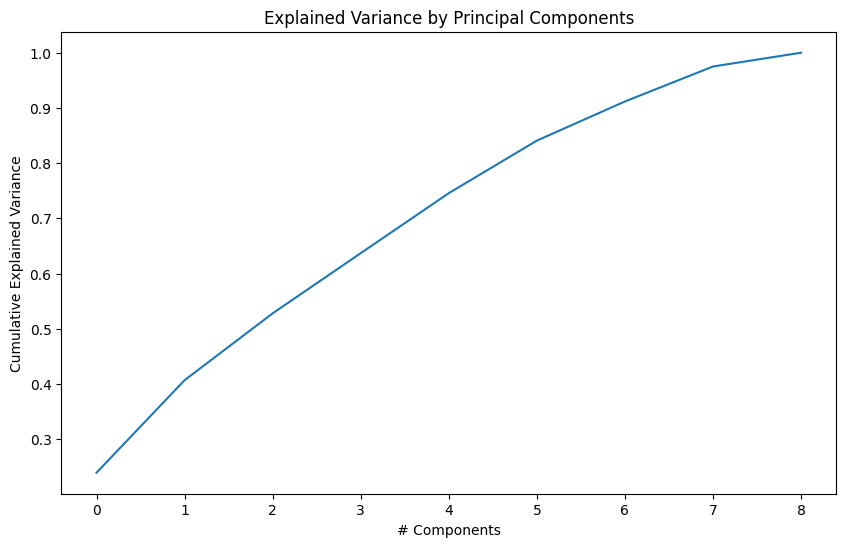

Number of components to retain: 7


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming `scaled_features` is already defined from the previous step
# and `scaled_df` is the DataFrame with the scaled features.

# Initialize PCA and fit it to the scaled features
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('# Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components to retain 90% of the variance
n_components = next(i for i, total in enumerate(np.cumsum(explained_variance_ratio), start=1) if total >= 0.9)
print(f"Number of components to retain: {n_components}")

# Perform PCA again with the determined number of components
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(scaled_features)

# Optionally, create a DataFrame for the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(n_components)])
print(reduced_df.head())


# Clustering

Implement K-means for clustering from scratch.

In [28]:
I want another code with the same functionality as the code below

class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
            self.tol = tol
        self.centroids = None
        self.labels = None
    
    def fit(self, X):
        np.random.seed(42)
        random_idxs = np.random.permutation(X.shape[0])
        self.centroids = X[random_idxs[:self.n_clusters]]
    def fit(self, X):
        np.random.seed(42)
        random_idxs = np.random.permutation(X.shape[0])
        self.centroids = X[random_idxs[:self.n_clusters]]
        
        for i in range(self.max_iter):
            self.labels = self.assign_labels(X)
            new_centroids = self.calculate_centroids(X)
            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
    
    def assign_labels(self, X):
        distances = self.calculate_distances(X, self.centroids)
        print(f"Distances shape: {distances.shape}")  # Debug statement
        return np.argmin(distances, axis=0)
    
    def calculate_distances(self, X, centroids):
        return np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    
    def calculate_centroids(self, X):
        centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i]
            print(f"Cluster {i} points shape: {cluster_points.shape}")  # Debug statement
            if cluster_points.shape[0] == 0:
                print(f"Warning: Cluster {i} is empty.")
                centroid = np.zeros(X.shape[1])
            else:
                centroid = cluster_points.mean(axis=0)
            centroids.append(centroid)
        return np.array(centroids)
    
    def predict(self, X):
        return self.assign_labels(X)


As the number of PCA components varies, the accuracy of the classifier can change significantly. Using too few components might lead to underfitting as important information might be lost. On the other hand, using too many components might not significantly improve accuracy and could increase computational cost. From the plotted results, we can determine the optimal number of components that provide the best balance between dimensionality reduction and classification accuracy

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

Distances shape: (2, 32828)
Cluster 0 points shape: (21652, 7)
Cluster 1 points shape: (11176, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22034, 7)
Cluster 1 points shape: (10794, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22097, 7)
Cluster 1 points shape: (10731, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22124, 7)
Cluster 1 points shape: (10704, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22392, 7)
Cluster 1 points shape: (10436, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22954, 7)
Cluster 1 points shape: (9874, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23322, 7)
Cluster 1 points shape: (9506, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23473, 7)
Cluster 1 points shape: (9355, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23490, 7)
Cluster 1 points shape: (9338, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23436, 7)
Cluster 1 points shape: (9392, 7)
Distances shape: (2, 3282

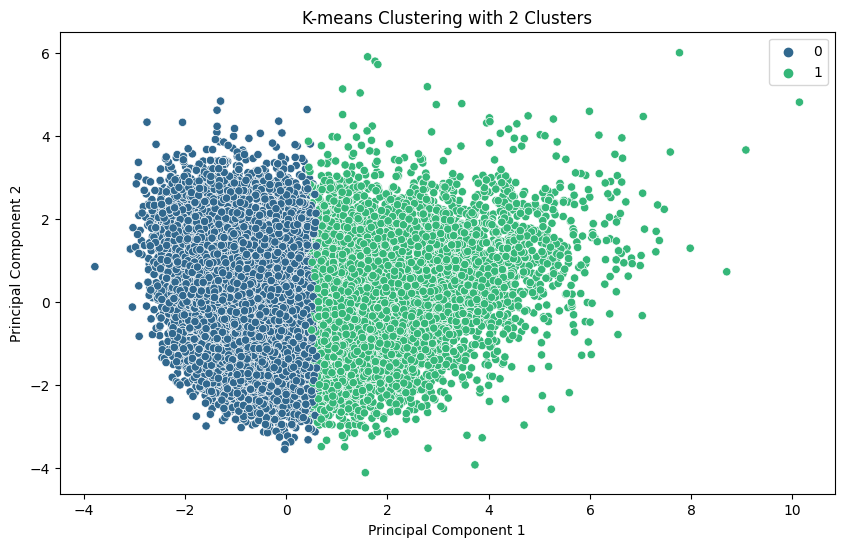

Distances shape: (3, 32828)
Cluster 0 points shape: (16895, 7)
Cluster 1 points shape: (8327, 7)
Cluster 2 points shape: (7606, 7)
Distances shape: (3, 32828)
Cluster 0 points shape: (17130, 7)
Cluster 1 points shape: (8058, 7)
Cluster 2 points shape: (7640, 7)
Distances shape: (3, 32828)
Cluster 0 points shape: (17749, 7)
Cluster 1 points shape: (7601, 7)
Cluster 2 points shape: (7478, 7)
Distances shape: (3, 32828)
Cluster 0 points shape: (18217, 7)
Cluster 1 points shape: (7275, 7)
Cluster 2 points shape: (7336, 7)
Distances shape: (3, 32828)
Cluster 0 points shape: (18437, 7)
Cluster 1 points shape: (7130, 7)
Cluster 2 points shape: (7261, 7)
Distances shape: (3, 32828)
Cluster 0 points shape: (18352, 7)
Cluster 1 points shape: (7290, 7)
Cluster 2 points shape: (7186, 7)
Distances shape: (3, 32828)
Cluster 0 points shape: (17986, 7)
Cluster 1 points shape: (7731, 7)
Cluster 2 points shape: (7111, 7)
Distances shape: (3, 32828)
Cluster 0 points shape: (17321, 7)
Cluster 1 points sha

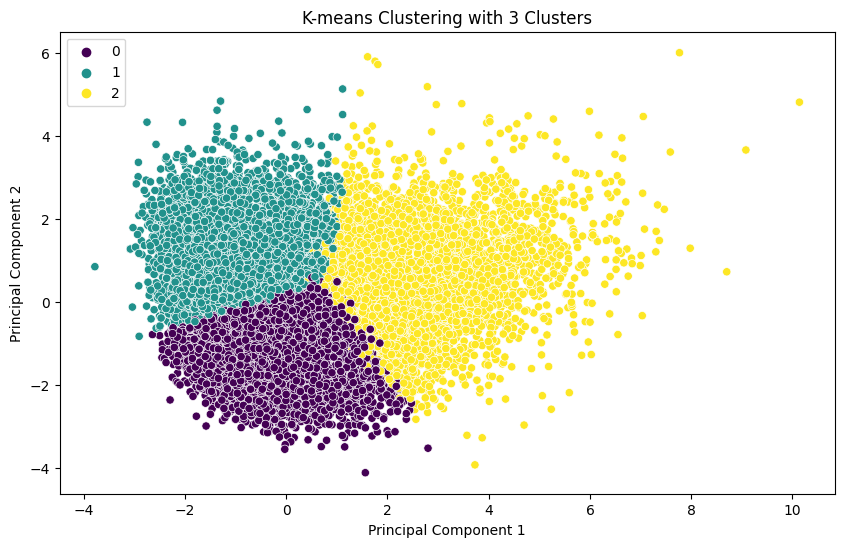

Distances shape: (4, 32828)
Cluster 0 points shape: (11982, 7)
Cluster 1 points shape: (7711, 7)
Cluster 2 points shape: (5555, 7)
Cluster 3 points shape: (7580, 7)
Distances shape: (4, 32828)
Cluster 0 points shape: (11817, 7)
Cluster 1 points shape: (6233, 7)
Cluster 2 points shape: (5861, 7)
Cluster 3 points shape: (8917, 7)
Distances shape: (4, 32828)
Cluster 0 points shape: (12321, 7)
Cluster 1 points shape: (5308, 7)
Cluster 2 points shape: (5849, 7)
Cluster 3 points shape: (9350, 7)
Distances shape: (4, 32828)
Cluster 0 points shape: (12756, 7)
Cluster 1 points shape: (4819, 7)
Cluster 2 points shape: (5736, 7)
Cluster 3 points shape: (9517, 7)
Distances shape: (4, 32828)
Cluster 0 points shape: (13052, 7)
Cluster 1 points shape: (4487, 7)
Cluster 2 points shape: (5656, 7)
Cluster 3 points shape: (9633, 7)
Distances shape: (4, 32828)
Cluster 0 points shape: (13231, 7)
Cluster 1 points shape: (4284, 7)
Cluster 2 points shape: (5607, 7)
Cluster 3 points shape: (9706, 7)
Distances 

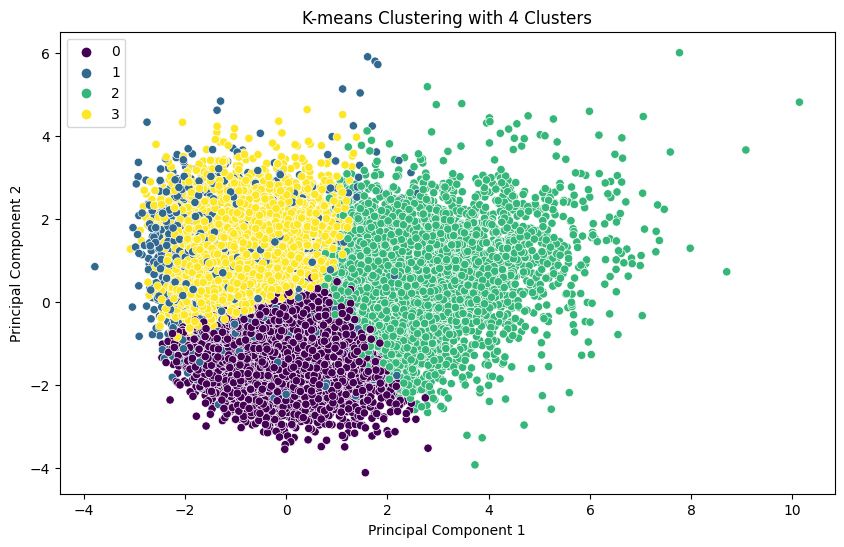

Distances shape: (5, 32828)
Cluster 0 points shape: (10907, 7)
Cluster 1 points shape: (7202, 7)
Cluster 2 points shape: (4497, 7)
Cluster 3 points shape: (7319, 7)
Cluster 4 points shape: (2903, 7)
Distances shape: (5, 32828)
Cluster 0 points shape: (10976, 7)
Cluster 1 points shape: (5825, 7)
Cluster 2 points shape: (4115, 7)
Cluster 3 points shape: (8186, 7)
Cluster 4 points shape: (3726, 7)
Distances shape: (5, 32828)
Cluster 0 points shape: (11393, 7)
Cluster 1 points shape: (4986, 7)
Cluster 2 points shape: (4043, 7)
Cluster 3 points shape: (8501, 7)
Cluster 4 points shape: (3905, 7)
Distances shape: (5, 32828)
Cluster 0 points shape: (11541, 7)
Cluster 1 points shape: (4485, 7)
Cluster 2 points shape: (4013, 7)
Cluster 3 points shape: (8694, 7)
Cluster 4 points shape: (4095, 7)
Distances shape: (5, 32828)
Cluster 0 points shape: (11418, 7)
Cluster 1 points shape: (4133, 7)
Cluster 2 points shape: (4053, 7)
Cluster 3 points shape: (8814, 7)
Cluster 4 points shape: (4410, 7)
Dista

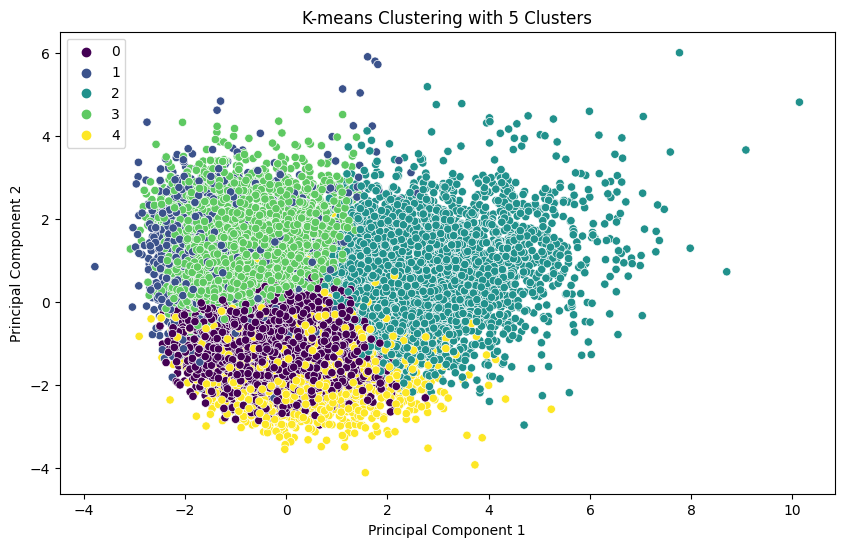

Distances shape: (6, 32828)
Cluster 0 points shape: (8373, 7)
Cluster 1 points shape: (4550, 7)
Cluster 2 points shape: (4277, 7)
Cluster 3 points shape: (7059, 7)
Cluster 4 points shape: (2079, 7)
Cluster 5 points shape: (6490, 7)
Distances shape: (6, 32828)
Cluster 0 points shape: (8104, 7)
Cluster 1 points shape: (4959, 7)
Cluster 2 points shape: (3961, 7)
Cluster 3 points shape: (7095, 7)
Cluster 4 points shape: (2413, 7)
Cluster 5 points shape: (6296, 7)
Distances shape: (6, 32828)
Cluster 0 points shape: (8796, 7)
Cluster 1 points shape: (4675, 7)
Cluster 2 points shape: (4174, 7)
Cluster 3 points shape: (7166, 7)
Cluster 4 points shape: (2055, 7)
Cluster 5 points shape: (5962, 7)
Distances shape: (6, 32828)
Cluster 0 points shape: (9703, 7)
Cluster 1 points shape: (4260, 7)
Cluster 2 points shape: (4629, 7)
Cluster 3 points shape: (7288, 7)
Cluster 4 points shape: (1552, 7)
Cluster 5 points shape: (5396, 7)
Distances shape: (6, 32828)
Cluster 0 points shape: (10175, 7)
Cluster 1

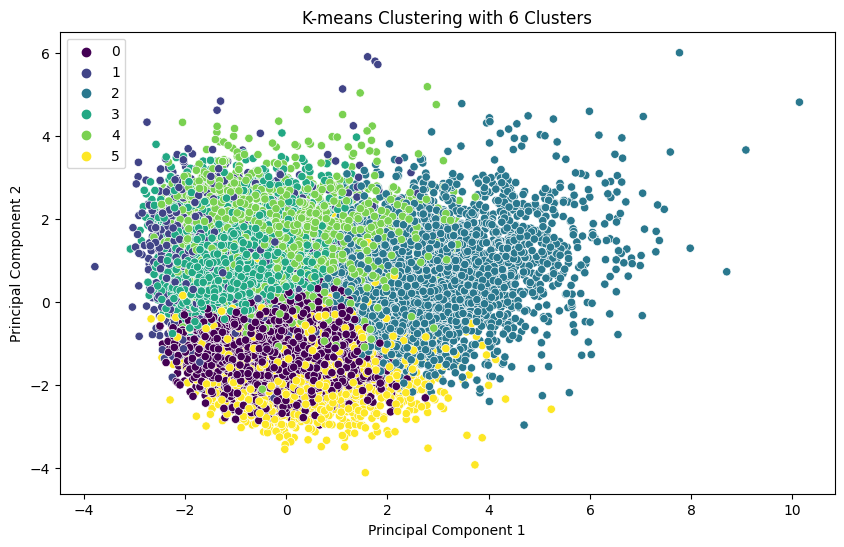

Distances shape: (7, 32828)
Cluster 0 points shape: (8373, 7)
Cluster 1 points shape: (4543, 7)
Cluster 2 points shape: (3243, 7)
Cluster 3 points shape: (6992, 7)
Cluster 4 points shape: (1568, 7)
Cluster 5 points shape: (6480, 7)
Cluster 6 points shape: (1629, 7)
Distances shape: (7, 32828)
Cluster 0 points shape: (7815, 7)
Cluster 1 points shape: (4793, 7)
Cluster 2 points shape: (3361, 7)
Cluster 3 points shape: (6731, 7)
Cluster 4 points shape: (1939, 7)
Cluster 5 points shape: (6171, 7)
Cluster 6 points shape: (2018, 7)
Distances shape: (7, 32828)
Cluster 0 points shape: (8160, 7)
Cluster 1 points shape: (4480, 7)
Cluster 2 points shape: (3986, 7)
Cluster 3 points shape: (6487, 7)
Cluster 4 points shape: (1717, 7)
Cluster 5 points shape: (5761, 7)
Cluster 6 points shape: (2237, 7)
Distances shape: (7, 32828)
Cluster 0 points shape: (8699, 7)
Cluster 1 points shape: (4014, 7)
Cluster 2 points shape: (4580, 7)
Cluster 3 points shape: (6122, 7)
Cluster 4 points shape: (2002, 7)
Clus

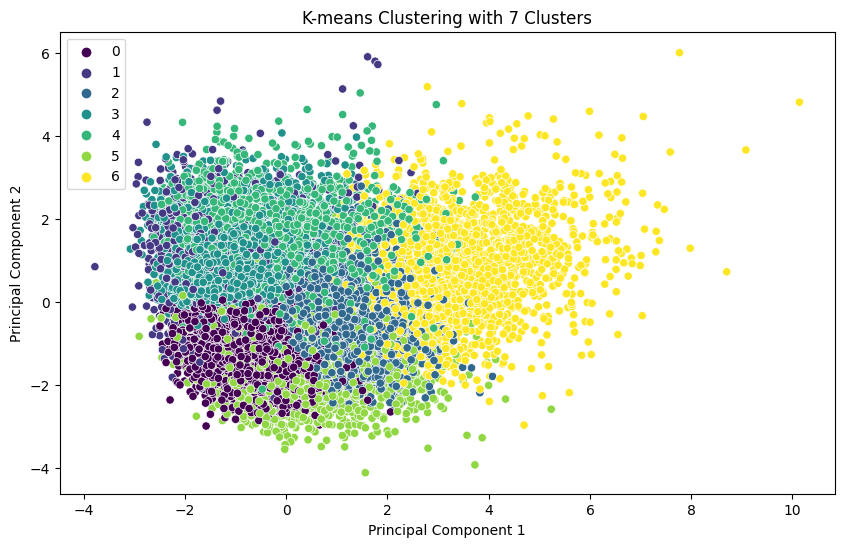

Distances shape: (8, 32828)
Cluster 0 points shape: (8279, 7)
Cluster 1 points shape: (4415, 7)
Cluster 2 points shape: (2401, 7)
Cluster 3 points shape: (6881, 7)
Cluster 4 points shape: (1553, 7)
Cluster 5 points shape: (6459, 7)
Cluster 6 points shape: (1599, 7)
Cluster 7 points shape: (1241, 7)
Distances shape: (8, 32828)
Cluster 0 points shape: (7624, 7)
Cluster 1 points shape: (4330, 7)
Cluster 2 points shape: (2792, 7)
Cluster 3 points shape: (6301, 7)
Cluster 4 points shape: (1823, 7)
Cluster 5 points shape: (5848, 7)
Cluster 6 points shape: (1919, 7)
Cluster 7 points shape: (2191, 7)
Distances shape: (8, 32828)
Cluster 0 points shape: (7736, 7)
Cluster 1 points shape: (3799, 7)
Cluster 2 points shape: (3746, 7)
Cluster 3 points shape: (5926, 7)
Cluster 4 points shape: (1640, 7)
Cluster 5 points shape: (5128, 7)
Cluster 6 points shape: (2093, 7)
Cluster 7 points shape: (2760, 7)
Distances shape: (8, 32828)
Cluster 0 points shape: (7970, 7)
Cluster 1 points shape: (3355, 7)
Clus

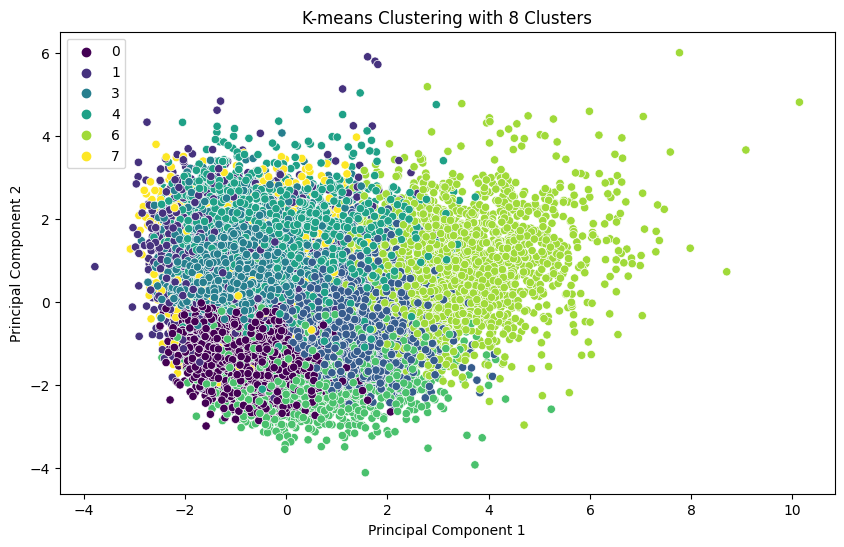

Distances shape: (9, 32828)
Cluster 0 points shape: (7131, 7)
Cluster 1 points shape: (4230, 7)
Cluster 2 points shape: (2401, 7)
Cluster 3 points shape: (6191, 7)
Cluster 4 points shape: (1553, 7)
Cluster 5 points shape: (6430, 7)
Cluster 6 points shape: (1599, 7)
Cluster 7 points shape: (1241, 7)
Cluster 8 points shape: (2052, 7)
Distances shape: (9, 32828)
Cluster 0 points shape: (6946, 7)
Cluster 1 points shape: (3765, 7)
Cluster 2 points shape: (2577, 7)
Cluster 3 points shape: (4690, 7)
Cluster 4 points shape: (1786, 7)
Cluster 5 points shape: (5444, 7)
Cluster 6 points shape: (1913, 7)
Cluster 7 points shape: (2111, 7)
Cluster 8 points shape: (3596, 7)
Distances shape: (9, 32828)
Cluster 0 points shape: (7579, 7)
Cluster 1 points shape: (3390, 7)
Cluster 2 points shape: (3052, 7)
Cluster 3 points shape: (4405, 7)
Cluster 4 points shape: (1585, 7)
Cluster 5 points shape: (4554, 7)
Cluster 6 points shape: (2057, 7)
Cluster 7 points shape: (2652, 7)
Cluster 8 points shape: (3554, 7

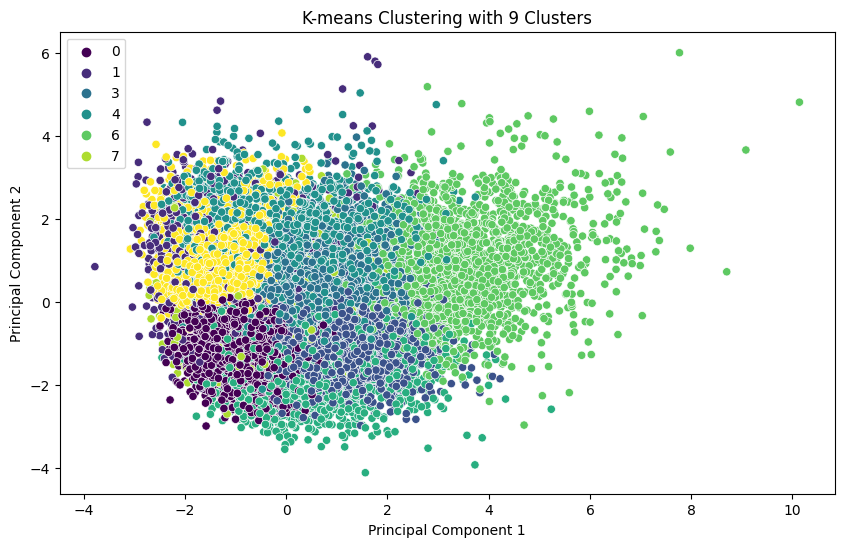

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

df = pd.DataFrame({
    'points': [18, np.nan, 19, 14, 14, 11, 20, 28, 30, 31, 35, 33, 29, 25, 25, 27, 29, 30, 19, 23],
    'assists': [3, 3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14, np.nan, 9, 4, 3, 4, 12, 15, 11],
    'rebounds': [15, 14, 14, 10, 8, 14, 13, 9, 5, 4, 11, 6, 5, 5, 3, 8, 12, 7, 6, 5]
})


df = df.dropna()
scaled_df = StandardScaler().fit_transform(df)


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    labels = kmeans.predict(scaled_df)
    y=reduced_features[:, 1], hue=labels, palette='viridis')
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels, cmap='viridis')
    plt.title(f'K-means Clustering with {k} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

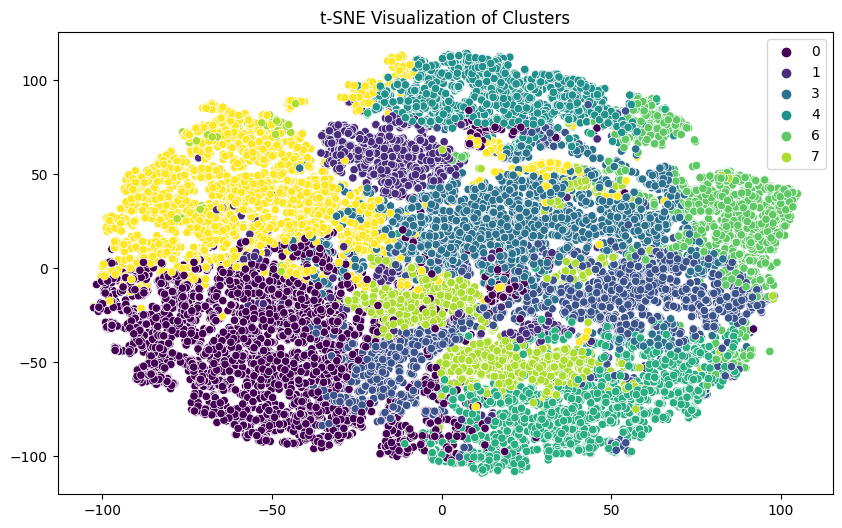

Distances shape: (2, 32828)
Cluster 0 points shape: (21652, 7)
Cluster 1 points shape: (11176, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22034, 7)
Cluster 1 points shape: (10794, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22097, 7)
Cluster 1 points shape: (10731, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22124, 7)
Cluster 1 points shape: (10704, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22392, 7)
Cluster 1 points shape: (10436, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22954, 7)
Cluster 1 points shape: (9874, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23322, 7)
Cluster 1 points shape: (9506, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23473, 7)
Cluster 1 points shape: (9355, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23490, 7)
Cluster 1 points shape: (9338, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23436, 7)
Cluster 1 points shape: (9392, 7)
Distances shape: (2, 3282

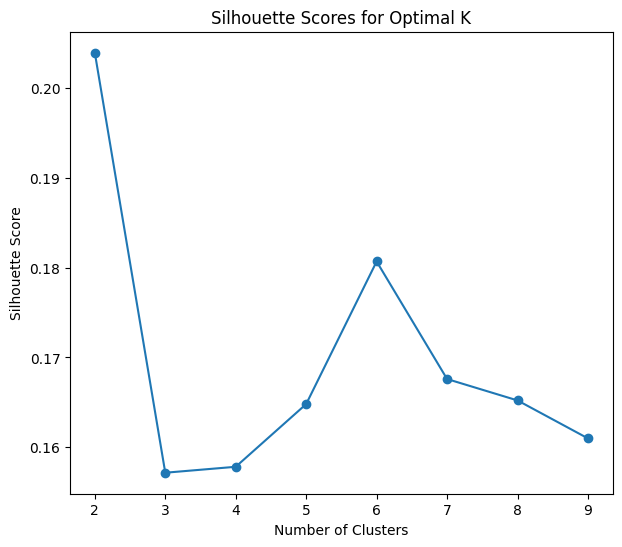

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(reduced_features)

# Visualize t-SNE clusters
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Compute silhouette scores for different K values
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_features)
    labels = kmeans.predict(reduced_features)
    silhouette_scores.append(silhouette_score(reduced_features, labels))
     score = silhouette_score(reduced_features, labels)
# Plot silhouette scores
plt.figure(figsize=(7, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('# Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')
plt.show()


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
import random

# Assuming `reduced_features`, `df`, and `KMeans` class are already defined or provided

# Function to simulate clustering analysis
def simulate_clustering(reduced_features, df):
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(reduced_features)
        labels = kmeans.predict(reduced_features)
        
        print(f"Number of Clusters: {k}")
        for cluster in range(k):
            cluster_songs = df[labels == cluster]['track_name']
            if len(cluster_songs) >= 2:
                sample_songs = random.sample(list(cluster_songs), 2)
                print(f"Cluster {cluster}: {sample_songs}")
            else:
                print(f"Cluster {cluster}: Not enough songs to sample")
        print()

# Example usage
simulate_clustering(reduced_features, df)



Distances shape: (2, 32828)
Cluster 0 points shape: (21652, 7)
Cluster 1 points shape: (11176, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22034, 7)
Cluster 1 points shape: (10794, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22097, 7)
Cluster 1 points shape: (10731, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22124, 7)
Cluster 1 points shape: (10704, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22392, 7)
Cluster 1 points shape: (10436, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (22954, 7)
Cluster 1 points shape: (9874, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23322, 7)
Cluster 1 points shape: (9506, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23473, 7)
Cluster 1 points shape: (9355, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23490, 7)
Cluster 1 points shape: (9338, 7)
Distances shape: (2, 32828)
Cluster 0 points shape: (23436, 7)
Cluster 1 points shape: (9392, 7)
Distances shape: (2, 3282

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

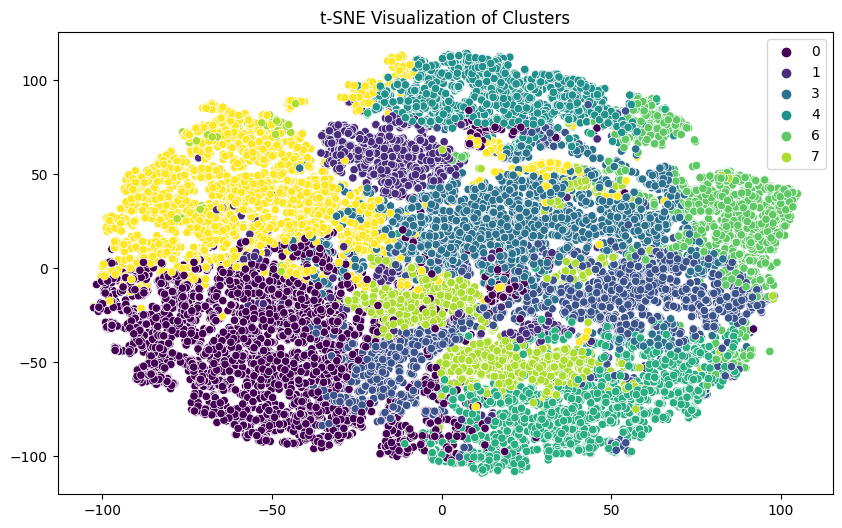

In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(reduced_features)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
